In [57]:
import pandas as pd
import urllib
import time
import numpy as np
import json
import matplotlib.pyplot as plt

In [58]:
df_churn = pd.read_csv("churn.csv")

In [59]:
df_nchurn = pd.read_csv("nchurn.csv")

In [60]:
df_churn = df_churn.drop(["Unnamed: 0"], axis = 1)
df_nchurn = df_nchurn.drop(["Unnamed: 0"], axis = 1)

In [61]:
df_churn = df_churn.astype(float)
df_nchurn = df_nchurn.astype(float)

In [62]:
df_churn["churn"] = 1
df_nchurn["churn"] = 0

In [63]:
df_mod = df_churn.append(df_nchurn)

In [64]:
df_mod = df_mod.sample(frac=1).reset_index(drop=True)

In [65]:
df_mod

,MPERK_PGM_ENRL_ID,TN_ID,Total_Sales,Beauty_Care_QTY,Otc_Health_Care_QTY,Baby_QTY,Card_And_Party_QTY,Hardlines_And_Home_QTY,Grocery_Food_QTY,Coffee_Tea_Cocoa_QTY,...,Seafood_Sales,Packaged_Meat_Sales,Pharmacy_Visit,TotalSalesM0,TotalSalesM1,TotalSalesM2,TransactionM0,TransactionM1,TransactionM2,churn
0,4.680075e+10,8.666667,513.403333,2.333333,6.000000,0.666667,0.000000,4.666667,47.000000,1.000000,...,3.330000,15.400000,0.666667,627.21,524.67,388.33,10.0,7.0,9.0,0
1,4.680197e+10,2.000000,58.560000,0.000000,0.666667,0.000000,0.000000,0.000000,8.333333,0.000000,...,0.000000,6.286667,0.000000,51.29,65.30,59.09,2.0,1.0,3.0,1
2,4.680674e+10,8.000000,183.973333,1.000000,2.000000,0.000000,0.000000,1.000000,19.333333,0.000000,...,0.000000,1.463333,0.000000,191.11,17.53,343.28,7.0,1.0,16.0,0
3,4.680922e+10,8.666667,1063.443333,4.000000,7.666667,0.000000,0.000000,2.333333,83.000000,1.333333,...,9.326667,16.433333,0.000000,1020.40,712.86,1457.07,10.0,4.0,12.0,0
4,4.680818e+10,2.333333,83.423333,0.333333,0.666667,0.000000,0.333333,6.666667,2.333333,0.000000,...,0.000000,4.126667,0.000000,165.55,20.20,64.52,4.0,1.0,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
217537,4.680308e+10,7.666667,581.636667,8.000000,2.666667,0.333333,1.333333,6.000000,45.000000,2.000000,...,0.000000,30.160000,1.666667,691.10,467.20,586.61,5.0,9.0,9.0,0
217538,4.680924e+10,4.333333,124.040000,0.000000,0.666667,0.000000,0.000000,0.000000,11.333333,0.000000,...,5.250000,4.703333,0.000000,76.94,129.79,165.39,2.0,5.0,6.0,0
217539,4.680192e+10,4.666667,175.086667,0.000000,0.333333,0.000000,0.000000,7.333333,15.333333,0.000000,...,3.326667,11.323333,0.000000,57.03,196.05,272.18,4.0,4.0,6.0,0
217540,4.680201e+10,9.666667,370.433333,0.666667,0.666667,0.000000,2.000000,12.000000,24.333333,0.000000,...,0.000000,23.596667,0.000000,138.78,674.13,298.39,6.0,12.0,11.0,0


In [66]:
df_cluster = df_mod.copy()
df_cluster["val_per"] = df_cluster["Total_Sales"]/df_cluster["TN_ID"]

In [67]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))

clustering_df=pd.DataFrame(scaler.fit_transform(df_cluster[["Total_Sales","TN_ID","val_per"]]), columns=df_cluster[["Total_Sales","TN_ID","val_per"]].columns)
clustering_df.head()

,Total_Sales,TN_ID,val_per
0,0.038637,0.105023,0.075408
1,0.005204,0.013699,0.042806
2,0.014422,0.095890,0.035969
3,0.079068,0.105023,0.144472
4,0.007031,0.018265,0.049850


In [68]:
x = clustering_df # 1t for rows and second for columns
x

,Total_Sales,TN_ID,val_per
0,0.038637,0.105023,0.075408
1,0.005204,0.013699,0.042806
2,0.014422,0.095890,0.035969
3,0.079068,0.105023,0.144472
4,0.007031,0.018265,0.049850
...,...,...,...
217537,0.043653,0.091324,0.093501
217538,0.010017,0.045662,0.042093
217539,0.013769,0.050228,0.051772
217540,0.028128,0.118721,0.052645


In [69]:
import matplotlib.pyplot as plt
from kneed import KneeLocator
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(x)
    sse.append(kmeans.inertia_)

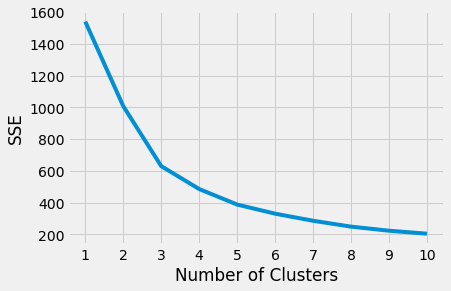

In [70]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [71]:
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)

kl.elbow

3

In [72]:
kmeans = KMeans(n_clusters=4, random_state=2201)
kmeans.fit(x)

KMeans(n_clusters=4, random_state=2201)

In [73]:
identified_clusters = kmeans.fit_predict(x)
identified_clusters

array([1, 2, 1, ..., 2, 1, 2], dtype=int32)

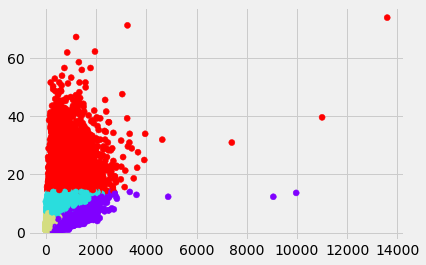

In [74]:
data_with_clusters = df_mod.copy()
data_with_clusters['Clusters'] = identified_clusters 
plt.scatter(data_with_clusters['Total_Sales'],data_with_clusters['TN_ID'],c=data_with_clusters['Clusters'],cmap='rainbow')

In [80]:
high_value = data_with_clusters[data_with_clusters["Clusters"]==0]
med_value = data_with_clusters[data_with_clusters["Clusters"]==2]
low_value = data_with_clusters[data_with_clusters["Clusters"]==1]
new_value = data_with_clusters[data_with_clusters["Clusters"]==3]

In [81]:
high_value["churn"].mean()

0.29277524458807386

In [82]:
med_value["churn"].mean()

0.39388885244979993

In [83]:
new_value["churn"].mean()

0.020987012987012988

In [84]:
print(high_value.TN_ID.mean())
print(high_value.Total_Sales.mean())
print(med_value.TN_ID.mean())
print(med_value.Total_Sales.mean())
print(low_value.TN_ID.mean())
print(low_value.Total_Sales.mean())
print(new_value.TN_ID.mean())
print(new_value.Total_Sales.mean())

3.44080083225895
512.9285304793361
3.2131030799311344
182.2107573656546
8.862223888412831
530.4871628642271
19.566251082250794
811.9042200865514


In [85]:
med_value['Trx_DiffM1'] = (med_value['TransactionM1']/med_value['TransactionM0'])-1
med_value['Trx_DiffM2'] = (med_value['TransactionM2']/med_value['TransactionM1'])-1
med_value['Sale_DiffM1'] = (med_value['TotalSalesM1']/med_value['TotalSalesM0'])-1
med_value['Sale_DiffM2'] = (med_value['TotalSalesM2']/med_value['TotalSalesM1'])-1

<ipython-input-85-2d344b4d8349>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_value['Trx_DiffM1'] = (med_value['TransactionM1']/med_value['TransactionM0'])-1
<ipython-input-85-2d344b4d8349>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  med_value['Trx_DiffM2'] = (med_value['TransactionM2']/med_value['TransactionM1'])-1
<ipython-input-85-2d344b4d8349>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [86]:
df_Trx1 = pd.DataFrame()
df_Trx2 = pd.DataFrame()
df_Sale1 = pd.DataFrame()
df_Sale2 = pd.DataFrame()


df_Trx1['Trx_DiffM1'] = med_value['Trx_DiffM1'][med_value.Trx_DiffM1 < 0]
df_Trx2['Trx_DiffM2'] = med_value['Trx_DiffM2'][med_value.Trx_DiffM2 < 0]
df_Sale1['Sale_DiffM1'] = med_value['Sale_DiffM1'][med_value.Sale_DiffM1 < 0]
df_Sale2['Sale_DiffM2'] = med_value['Sale_DiffM1'][med_value.Sale_DiffM1 < 0]



thres_TrxM1 = df_Trx1.Trx_DiffM1.quantile(0.75)
thres_TrxM2 = df_Trx2.Trx_DiffM2.quantile(0.75)
thres_SaleM1 = df_Sale1.Sale_DiffM1.quantile(0.75)
thres_SaleM2 = df_Sale2.Sale_DiffM2.quantile(0.75)
print(thres_TrxM1,thres_TrxM2,thres_SaleM1,thres_SaleM2)

-0.33333333333333337 -0.33333333333333337 -0.2564313644782876 -0.2564313644782876


In [88]:
df_groc = pd.read_csv("not_churned_groc.csv")
df_cgroc = pd.read_csv("ChurnedGroceries.csv")
df_groc = df_groc.drop(["Unnamed: 0"], axis = 1)
df_cgroc = df_cgroc.drop(["Unnamed: 0"], axis = 1)
df_appgroc = df_groc.append(df_cgroc)

In [89]:
med_value = pd.merge(med_value, df_appgroc, how="inner", on=["MPERK_PGM_ENRL_ID"])
med_value.head()

,MPERK_PGM_ENRL_ID,TN_ID,Total_Sales,Beauty_Care_QTY,Otc_Health_Care_QTY,Baby_QTY,Card_And_Party_QTY,Hardlines_And_Home_QTY,Grocery_Food_QTY,Coffee_Tea_Cocoa_QTY,...,M1Sales_Change,M2Sales_Change,M1Trx_Change,M2Trx_Change,GrocerySalesM0,GrocerySalesM1,GrocerySalesM2,GroceryQtyM0,GroceryQtyM1,GroceryQtyM2
0,4.680197e+10,2.000000,58.560000,0.000000,0.666667,0.0,0.000000,0.000000,8.333333,0.0,...,1,0,0,1,11.50,12.57,25.59,4,8,13
1,4.680818e+10,2.333333,83.423333,0.333333,0.666667,0.0,0.333333,6.666667,2.333333,0.0,...,0,1,0,1,15.86,0.00,0.00,7,0,0
2,4.680972e+10,1.000000,27.235000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,1,0,1,0,0.00,0.00,0.00,0,0,0
3,4.680043e+10,1.333333,6.406667,0.000000,0.000000,0.0,0.000000,0.000000,1.333333,0.0,...,1,0,0,1,0.00,6.77,1.89,0,3,1
4,4.680246e+10,1.666667,85.226667,0.000000,2.000000,0.0,0.000000,0.333333,7.666667,0.0,...,1,0,1,0,8.00,13.82,21.24,4,8,11


In [90]:
med_value['GTrx_DiffM1'] = (med_value['GroceryQtyM1']/med_value['GroceryQtyM0'])-1
med_value['GTrx_DiffM2'] = (med_value['GroceryQtyM2']/med_value['GroceryQtyM1'])-1
med_value['GSale_DiffM1'] = (med_value['GrocerySalesM1']/med_value['GrocerySalesM0'])-1
med_value['GSale_DiffM2'] = (med_value['GrocerySalesM2']/med_value['GrocerySalesM1'])-1

In [91]:
med_value_df = med_value.drop(["TotalSalesM2","TotalSalesM1","TotalSalesM0", "TransactionM0", "TransactionM1", "TransactionM2","GrocerySalesM1","GrocerySalesM0","GrocerySalesM2","GroceryQtyM1","GroceryQtyM0","GroceryQtyM2"], axis = 1)

In [92]:
df_GTrx1 = pd.DataFrame()
df_GTrx2 = pd.DataFrame()
df_GSale1 = pd.DataFrame()
df_GSale2 = pd.DataFrame()


df_GTrx1['GTrx_DiffM1'] = med_value['GTrx_DiffM1'][med_value.GTrx_DiffM1 < 0]
df_GTrx2['GTrx_DiffM2'] = med_value['GTrx_DiffM2'][med_value.GTrx_DiffM2 < 0]
df_GSale1['GSale_DiffM1'] = med_value['GSale_DiffM1'][med_value.GSale_DiffM1 < 0]
df_GSale2['GSale_DiffM2'] = med_value['GSale_DiffM2'][med_value.GSale_DiffM2 < 0]



thres_GTrxM1 = df_GTrx1.GTrx_DiffM1.quantile(0.75)
thres_GTrxM2 = df_GTrx2.GTrx_DiffM2.quantile(0.75)
thres_GSaleM1 = df_GSale1.GSale_DiffM1.quantile(0.75)
thres_GSaleM2 = df_GSale2.GSale_DiffM2.quantile(0.75)
print(thres_GTrxM1,thres_GTrxM2,thres_GSaleM1,thres_GSaleM2)

-0.33333333333333337 -0.33333333333333337 -0.2668831819531795 -0.25881015536187957


In [93]:
med_value = med_value.drop(["TotalSalesM2","TotalSalesM1","TotalSalesM0", "TransactionM0", "TransactionM1", "TransactionM2","GrocerySalesM1","GrocerySalesM0","GrocerySalesM2","GroceryQtyM1","GroceryQtyM0","GroceryQtyM2"], axis = 1)

In [94]:
med_value["M1Sales_Change"] = 0
med_value["M2Sales_Change"] = 0
med_value["M1Trx_Change"] = 0
med_value["M2Trx_Change"] = 0
for i in range(len(med_value)):
    med_value["M1Trx_Change"].iloc[i] = 1 if (med_value["Trx_DiffM1"].iloc[i]>thres_TrxM1) else 0
    med_value["M2Trx_Change"].iloc[i] = 1 if (med_value["Trx_DiffM2"].iloc[i]>thres_TrxM2) else 0
    med_value["M1Sales_Change"].iloc[i] = 1 if (med_value["Sale_DiffM1"].iloc[i]>thres_SaleM1) else 0
    med_value["M2Sales_Change"].iloc[i] = 1 if (med_value["Sale_DiffM1"].iloc[i]>thres_SaleM2) else 0

med_value.head()

/Users/raghavxt/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,MPERK_PGM_ENRL_ID,TN_ID,Total_Sales,Beauty_Care_QTY,Otc_Health_Care_QTY,Baby_QTY,Card_And_Party_QTY,Hardlines_And_Home_QTY,Grocery_Food_QTY,Coffee_Tea_Cocoa_QTY,...,Sale_DiffM1,Sale_DiffM2,M1Sales_Change,M2Sales_Change,M1Trx_Change,M2Trx_Change,GTrx_DiffM1,GTrx_DiffM2,GSale_DiffM1,GSale_DiffM2
0,4.680197e+10,2.000000,58.560000,0.000000,0.666667,0.0,0.000000,0.000000,8.333333,0.0,...,0.273153,-0.095100,1,1,0,1,1.0,0.625000,0.093043,1.035800
1,4.680818e+10,2.333333,83.423333,0.333333,0.666667,0.0,0.333333,6.666667,2.333333,0.0,...,-0.877982,2.194059,0,0,0,1,-1.0,NaN,-1.000000,NaN
2,4.680972e+10,1.000000,27.235000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,inf,-0.655726,1,1,1,1,NaN,NaN,NaN,NaN
3,4.680043e+10,1.333333,6.406667,0.000000,0.000000,0.0,0.000000,0.000000,1.333333,0.0,...,2.832740,-0.476323,1,1,1,1,inf,-0.666667,inf,-0.720827
4,4.680246e+10,1.666667,85.226667,0.000000,2.000000,0.0,0.000000,0.333333,7.666667,0.0,...,3.799476,-0.215371,1,1,1,1,1.0,0.375000,0.727500,0.536903


In [95]:
med_value["M1GrocSales_Change"] = 0
med_value["M2GrocSales_Change"] = 0
med_value["M1GrocTrx_Change"] = 0
med_value["M2GrocTrx_Change"] = 0
for i in range(len(med_value)):
    med_value["M1GrocSales_Change"].iloc[i] = 1 if (med_value["GSale_DiffM1"].iloc[i]>thres_GSaleM1) else 0
    med_value["M2GrocSales_Change"].iloc[i] = 1 if (med_value["GSale_DiffM2"].iloc[i]>thres_GSaleM2) else 0
    med_value["M1GrocTrx_Change"].iloc[i] = 1 if (med_value["GTrx_DiffM1"].iloc[i]>thres_GTrxM1) else 0
    med_value["M2GrocTrx_Change"].iloc[i] = 1 if (med_value["GTrx_DiffM2"].iloc[i]>thres_GTrxM2) else 0

/Users/raghavxt/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [96]:
med_value = med_value.drop(['GSale_DiffM1','GSale_DiffM2','GTrx_DiffM1','GTrx_DiffM2','Trx_DiffM1','Trx_DiffM2','Sale_DiffM1','Sale_DiffM2'], axis = 1)
med_value.head()

,MPERK_PGM_ENRL_ID,TN_ID,Total_Sales,Beauty_Care_QTY,Otc_Health_Care_QTY,Baby_QTY,Card_And_Party_QTY,Hardlines_And_Home_QTY,Grocery_Food_QTY,Coffee_Tea_Cocoa_QTY,...,churn,Clusters,M1Sales_Change,M2Sales_Change,M1Trx_Change,M2Trx_Change,M1GrocSales_Change,M2GrocSales_Change,M1GrocTrx_Change,M2GrocTrx_Change
0,4.680197e+10,2.000000,58.560000,0.000000,0.666667,0.0,0.000000,0.000000,8.333333,0.0,...,1,2,1,1,0,1,1,1,1,1
1,4.680818e+10,2.333333,83.423333,0.333333,0.666667,0.0,0.333333,6.666667,2.333333,0.0,...,1,2,0,0,0,1,0,0,0,0
2,4.680972e+10,1.000000,27.235000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,...,1,2,1,1,1,1,0,0,0,0
3,4.680043e+10,1.333333,6.406667,0.000000,0.000000,0.0,0.000000,0.000000,1.333333,0.0,...,1,2,1,1,1,1,1,0,1,0
4,4.680246e+10,1.666667,85.226667,0.000000,2.000000,0.0,0.000000,0.333333,7.666667,0.0,...,1,2,1,1,1,1,1,1,1,1


In [97]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

x = med_value.drop(["MPERK_PGM_ENRL_ID","Clusters","churn","Total_Sales","TN_ID"], axis = 1)

y = med_value[['churn']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [98]:
# First XGBoost model
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/Users/raghavxt/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/raghavxt/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[13:43:25] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 89.56%


[0.0207388  0.02814927 0.00345325 0.01150201 0.01886083 0.04148421
 0.01412015 0.01821456 0.03310598 0.00895846 0.01828982 0.01038811
 0.02182967 0.01547377 0.00973602 0.01236941 0.02074395 0.01422391
 0.01321442 0.00351766 0.00418591 0.00521456 0.00740841 0.00283999
 0.00455086 0.00334265 0.04071353 0.00313044 0.00322388 0.0031418
 0.003812   0.00420971 0.00437476 0.00293235 0.00833154 0.00631176
 0.00417628 0.00284341 0.0030427  0.00414781 0.0027513  0.00316127
 0.04346881 0.0704723  0.         0.1275377  0.10096507 0.06887639
 0.02706321 0.05135017 0.04404518]


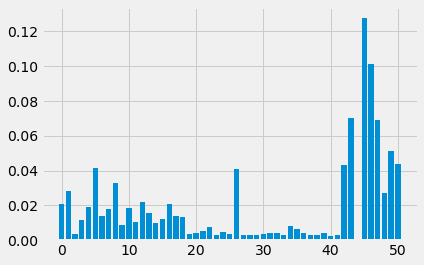

In [99]:
from matplotlib import pyplot
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [100]:
x.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 106932 entries, 0 to 106931
Data columns (total 51 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   Beauty_Care_QTY            106932 non-null  float64
 1   Otc_Health_Care_QTY        106932 non-null  float64
 2   Baby_QTY                   106932 non-null  float64
 3   Card_And_Party_QTY         106932 non-null  float64
 4   Hardlines_And_Home_QTY     106932 non-null  float64
 5   Grocery_Food_QTY           106932 non-null  float64
 6   Coffee_Tea_Cocoa_QTY       106932 non-null  float64
 7   Frozen_Foods_QTY           106932 non-null  float64
 8   Dairy_and_Eggs_QTY         106932 non-null  float64
 9   Alcoholic_Beverages_QTY    106932 non-null  float64
 10  Cold_Beverage_QTY          106932 non-null  float64
 11  Softlines_QTY              106932 non-null  float64
 12  Consumables_QTY            106932 non-null  float64
 13  DIY_Auto_QTY               10

[[18591   904]
 [ 2446 10139]]


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

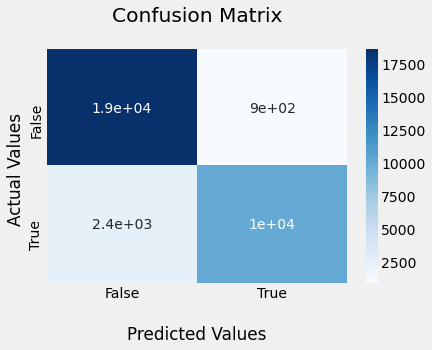

In [102]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
import seaborn as sns 
ax = sns.heatmap(matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n') 
ax.set_xlabel('\nPredicted Values') 
ax.set_ylabel('Actual Values ')
## Ticket labels - List must be in alphabetical order 
ax.xaxis.set_ticklabels(['False','True']) 
ax.yaxis.set_ticklabels(['False','True'])

## High Value

In [103]:
high_value['Trx_DiffM1'] = (high_value['TransactionM1']/high_value['TransactionM0'])-1
high_value['Trx_DiffM2'] = (high_value['TransactionM2']/high_value['TransactionM1'])-1
high_value['Sale_DiffM1'] = (high_value['TotalSalesM1']/high_value['TotalSalesM0'])-1
high_value['Sale_DiffM2'] = (high_value['TotalSalesM2']/high_value['TotalSalesM1'])-1

<ipython-input-103-f231904ddc79>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_value['Trx_DiffM1'] = (high_value['TransactionM1']/high_value['TransactionM0'])-1
<ipython-input-103-f231904ddc79>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  high_value['Trx_DiffM2'] = (high_value['TransactionM2']/high_value['TransactionM1'])-1
<ipython-input-103-f231904ddc79>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = valu

In [104]:
df_Trx1 = pd.DataFrame()
df_Trx2 = pd.DataFrame()
df_Sale1 = pd.DataFrame()
df_Sale2 = pd.DataFrame()


df_Trx1['Trx_DiffM1'] = high_value['Trx_DiffM1'][high_value.Trx_DiffM1 < 0]
df_Trx2['Trx_DiffM2'] = high_value['Trx_DiffM2'][high_value.Trx_DiffM2 < 0]
df_Sale1['Sale_DiffM1'] = high_value['Sale_DiffM1'][high_value.Sale_DiffM1 < 0]
df_Sale2['Sale_DiffM2'] = high_value['Sale_DiffM1'][high_value.Sale_DiffM1 < 0]



thres_TrxM1 = df_Trx1.Trx_DiffM1.quantile(0.75)
thres_TrxM2 = df_Trx2.Trx_DiffM2.quantile(0.75)
thres_SaleM1 = df_Sale1.Sale_DiffM1.quantile(0.75)
thres_SaleM2 = df_Sale2.Sale_DiffM2.quantile(0.75)
print(thres_TrxM1,thres_TrxM2,thres_SaleM1,thres_SaleM2)

-0.2857142857142857 -0.2727272727272727 -0.17879430918955075 -0.17879430918955075


In [105]:
high_value = pd.merge(high_value, df_appgroc, how="inner", on=["MPERK_PGM_ENRL_ID"])
high_value.head()

,MPERK_PGM_ENRL_ID,TN_ID,Total_Sales,Beauty_Care_QTY,Otc_Health_Care_QTY,Baby_QTY,Card_And_Party_QTY,Hardlines_And_Home_QTY,Grocery_Food_QTY,Coffee_Tea_Cocoa_QTY,...,Trx_DiffM1,Trx_DiffM2,Sale_DiffM1,Sale_DiffM2,GrocerySalesM0,GrocerySalesM1,GrocerySalesM2,GroceryQtyM0,GroceryQtyM1,GroceryQtyM2
0,4.680939e+10,2.000000,220.126667,4.333333,0.333333,0.000000,1.666667,0.000000,30.666667,0.333333,...,0.000000,0.0,-0.238107,-0.198255,91.48,39.84,48.13,51,20,21
1,4.680773e+10,2.000000,405.463333,3.000000,0.666667,0.000000,0.666667,0.666667,41.666667,0.666667,...,-0.333333,-0.5,-0.298390,-0.235683,543.55,381.36,291.48,3,2,1
2,4.680258e+10,2.666667,459.383333,2.333333,4.333333,0.666667,4.000000,2.666667,47.000000,0.000000,...,-0.333333,0.5,-0.290544,0.539775,491.87,348.96,537.32,3,2,3
3,4.680842e+10,4.000000,547.316667,2.333333,6.333333,0.000000,0.000000,2.333333,36.666667,3.000000,...,0.000000,0.0,-0.361563,0.434527,642.82,410.40,588.73,4,4,4
4,4.680911e+10,1.333333,211.546667,0.000000,1.666667,0.000000,1.666667,1.333333,17.666667,1.000000,...,0.000000,1.0,-0.750977,3.843561,45.90,5.08,75.13,18,2,33


In [106]:
high_value['GTrx_DiffM1'] = (high_value['GroceryQtyM1']/high_value['GroceryQtyM0'])-1
high_value['GTrx_DiffM2'] = (high_value['GroceryQtyM2']/high_value['GroceryQtyM1'])-1
high_value['GSale_DiffM1'] = (high_value['GrocerySalesM1']/high_value['GrocerySalesM0'])-1
high_value['GSale_DiffM2'] = (high_value['GrocerySalesM2']/high_value['GrocerySalesM1'])-1

In [107]:
high_value_df = high_value.drop(["TotalSalesM2","TotalSalesM1","TotalSalesM0", "TransactionM0", "TransactionM1", "TransactionM2","GrocerySalesM1","GrocerySalesM0","GrocerySalesM2","GroceryQtyM1","GroceryQtyM0","GroceryQtyM2"], axis = 1)

In [108]:
df_GTrx1 = pd.DataFrame()
df_GTrx2 = pd.DataFrame()
df_GSale1 = pd.DataFrame()
df_GSale2 = pd.DataFrame()


df_GTrx1['GTrx_DiffM1'] = high_value['GTrx_DiffM1'][high_value.GTrx_DiffM1 < 0]
df_GTrx2['GTrx_DiffM2'] = high_value['GTrx_DiffM2'][high_value.GTrx_DiffM2 < 0]
df_GSale1['GSale_DiffM1'] = high_value['GSale_DiffM1'][high_value.GSale_DiffM1 < 0]
df_GSale2['GSale_DiffM2'] = high_value['GSale_DiffM2'][high_value.GSale_DiffM2 < 0]



thres_GTrxM1 = df_GTrx1.GTrx_DiffM1.quantile(0.75)
thres_GTrxM2 = df_GTrx2.GTrx_DiffM2.quantile(0.75)
thres_GSaleM1 = df_GSale1.GSale_DiffM1.quantile(0.75)
thres_GSaleM2 = df_GSale2.GSale_DiffM2.quantile(0.75)
print(thres_GTrxM1,thres_GTrxM2,thres_GSaleM1,thres_GSaleM2)

-0.2702702702702703 -0.25 -0.18522037774925224 -0.1718523634345268


In [109]:
high_value = high_value.drop(["TotalSalesM2","TotalSalesM1","TotalSalesM0", "TransactionM0", "TransactionM1", "TransactionM2","GrocerySalesM1","GrocerySalesM0","GrocerySalesM2","GroceryQtyM1","GroceryQtyM0","GroceryQtyM2"], axis = 1)

In [110]:
high_value["M1Sales_Change"] = 0
high_value["M2Sales_Change"] = 0
high_value["M1Trx_Change"] = 0
high_value["M2Trx_Change"] = 0
for i in range(len(high_value)):
    high_value["M1Trx_Change"].iloc[i] = 1 if (high_value["Trx_DiffM1"].iloc[i]>thres_TrxM1) else 0
    high_value["M2Trx_Change"].iloc[i] = 1 if (high_value["Trx_DiffM2"].iloc[i]>thres_TrxM2) else 0
    high_value["M1Sales_Change"].iloc[i] = 1 if (high_value["Sale_DiffM1"].iloc[i]>thres_SaleM1) else 0
    high_value["M2Sales_Change"].iloc[i] = 1 if (high_value["Sale_DiffM1"].iloc[i]>thres_SaleM2) else 0

high_value.head()

/Users/raghavxt/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


,MPERK_PGM_ENRL_ID,TN_ID,Total_Sales,Beauty_Care_QTY,Otc_Health_Care_QTY,Baby_QTY,Card_And_Party_QTY,Hardlines_And_Home_QTY,Grocery_Food_QTY,Coffee_Tea_Cocoa_QTY,...,Sale_DiffM1,Sale_DiffM2,GTrx_DiffM1,GTrx_DiffM2,GSale_DiffM1,GSale_DiffM2,M1Sales_Change,M2Sales_Change,M1Trx_Change,M2Trx_Change
0,4.680939e+10,2.000000,220.126667,4.333333,0.333333,0.000000,1.666667,0.000000,30.666667,0.333333,...,-0.238107,-0.198255,-0.607843,0.05,-0.564495,0.208082,0,0,1,1
1,4.680773e+10,2.000000,405.463333,3.000000,0.666667,0.000000,0.666667,0.666667,41.666667,0.666667,...,-0.298390,-0.235683,-0.333333,-0.50,-0.298390,-0.235683,0,0,0,0
2,4.680258e+10,2.666667,459.383333,2.333333,4.333333,0.666667,4.000000,2.666667,47.000000,0.000000,...,-0.290544,0.539775,-0.333333,0.50,-0.290544,0.539775,0,0,0,1
3,4.680842e+10,4.000000,547.316667,2.333333,6.333333,0.000000,0.000000,2.333333,36.666667,3.000000,...,-0.361563,0.434527,0.000000,0.00,-0.361563,0.434527,0,0,1,1
4,4.680911e+10,1.333333,211.546667,0.000000,1.666667,0.000000,1.666667,1.333333,17.666667,1.000000,...,-0.750977,3.843561,-0.888889,15.50,-0.889325,13.789370,0,0,1,1


In [111]:
high_value["M1GrocSales_Change"] = 0
high_value["M2GrocSales_Change"] = 0
high_value["M1GrocTrx_Change"] = 0
high_value["M2GrocTrx_Change"] = 0
for i in range(len(high_value)):
    high_value["M1GrocSales_Change"].iloc[i] = 1 if (high_value["GSale_DiffM1"].iloc[i]>thres_GSaleM1) else 0
    high_value["M2GrocSales_Change"].iloc[i] = 1 if (high_value["GSale_DiffM2"].iloc[i]>thres_GSaleM2) else 0
    high_value["M1GrocTrx_Change"].iloc[i] = 1 if (high_value["GTrx_DiffM1"].iloc[i]>thres_GTrxM1) else 0
    high_value["M2GrocTrx_Change"].iloc[i] = 1 if (high_value["GTrx_DiffM2"].iloc[i]>thres_GTrxM2) else 0

/Users/raghavxt/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [112]:
high_value = high_value.drop(['GSale_DiffM1','GSale_DiffM2','GTrx_DiffM1','GTrx_DiffM2','Trx_DiffM1','Trx_DiffM2','Sale_DiffM1','Sale_DiffM2'], axis = 1)
high_value.head()

,MPERK_PGM_ENRL_ID,TN_ID,Total_Sales,Beauty_Care_QTY,Otc_Health_Care_QTY,Baby_QTY,Card_And_Party_QTY,Hardlines_And_Home_QTY,Grocery_Food_QTY,Coffee_Tea_Cocoa_QTY,...,churn,Clusters,M1Sales_Change,M2Sales_Change,M1Trx_Change,M2Trx_Change,M1GrocSales_Change,M2GrocSales_Change,M1GrocTrx_Change,M2GrocTrx_Change
0,4.680939e+10,2.000000,220.126667,4.333333,0.333333,0.000000,1.666667,0.000000,30.666667,0.333333,...,1,0,0,0,1,1,0,1,0,1
1,4.680773e+10,2.000000,405.463333,3.000000,0.666667,0.000000,0.666667,0.666667,41.666667,0.666667,...,0,0,0,0,0,0,0,0,0,0
2,4.680258e+10,2.666667,459.383333,2.333333,4.333333,0.666667,4.000000,2.666667,47.000000,0.000000,...,0,0,0,0,0,1,0,1,0,1
3,4.680842e+10,4.000000,547.316667,2.333333,6.333333,0.000000,0.000000,2.333333,36.666667,3.000000,...,0,0,0,0,1,1,0,1,1,1
4,4.680911e+10,1.333333,211.546667,0.000000,1.666667,0.000000,1.666667,1.333333,17.666667,1.000000,...,1,0,0,0,1,1,0,1,0,1


In [113]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

x = high_value.drop(["MPERK_PGM_ENRL_ID","Clusters","churn","Total_Sales","TN_ID"], axis = 1)

y = high_value[['churn']]

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [114]:
# First XGBoost model
from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

/Users/raghavxt/opt/anaconda3/lib/python3.8/site-packages/xgboost/sklearn.py:888: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)
/Users/raghavxt/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


[13:46:14] WARNING: /opt/concourse/worker/volumes/live/7a2b9f41-3287-451b-6691-43e9a6c0910f/volume/xgboost-split_1619728204606/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Accuracy: 89.22%


[0.01275724 0.02438259 0.00658697 0.01575142 0.01353892 0.00512719
 0.01485381 0.01020529 0.03835274 0.01158746 0.00860111 0.0163523
 0.00978016 0.0148766  0.01077804 0.01793238 0.01509199 0.01502307
 0.0246677  0.01151453 0.01155725 0.00829775 0.0132552  0.00561352
 0.00855831 0.01028594 0.10519032 0.00515892 0.00769273 0.00659672
 0.00939295 0.01284684 0.00676482 0.00850417 0.0114882  0.01426641
 0.00612086 0.00851829 0.00666481 0.00725174 0.00556919 0.00682235
 0.03144123 0.05905133 0.         0.11441753 0.05962921 0.066678
 0.02926737 0.02577812 0.02955843]


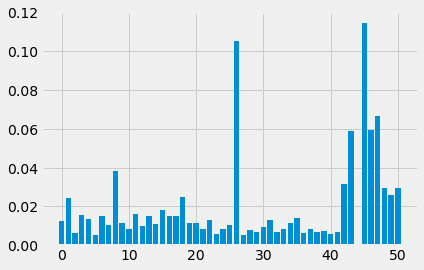

In [115]:
from matplotlib import pyplot
print(model.feature_importances_)
# plot
pyplot.bar(range(len(model.feature_importances_)), model.feature_importances_)
pyplot.show()

In [116]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45233 entries, 0 to 45232
Data columns (total 51 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Beauty_Care_QTY            45233 non-null  float64
 1   Otc_Health_Care_QTY        45233 non-null  float64
 2   Baby_QTY                   45233 non-null  float64
 3   Card_And_Party_QTY         45233 non-null  float64
 4   Hardlines_And_Home_QTY     45233 non-null  float64
 5   Grocery_Food_QTY           45233 non-null  float64
 6   Coffee_Tea_Cocoa_QTY       45233 non-null  float64
 7   Frozen_Foods_QTY           45233 non-null  float64
 8   Dairy_and_Eggs_QTY         45233 non-null  float64
 9   Alcoholic_Beverages_QTY    45233 non-null  float64
 10  Cold_Beverage_QTY          45233 non-null  float64
 11  Softlines_QTY              45233 non-null  float64
 12  Consumables_QTY            45233 non-null  float64
 13  DIY_Auto_QTY               45233 non-null  flo

[[9061  477]
 [ 986 3046]]


[Text(0, 0.5, 'False'), Text(0, 1.5, 'True')]

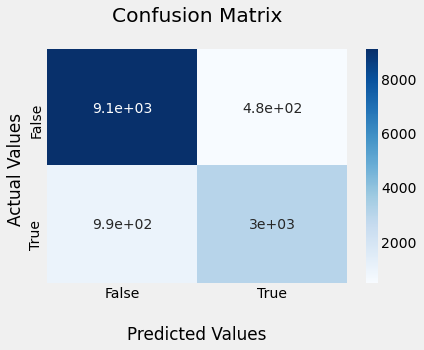

In [118]:
from sklearn.metrics import confusion_matrix
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
import seaborn as sns 
ax = sns.heatmap(matrix, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n') 
ax.set_xlabel('\nPredicted Values') 
ax.set_ylabel('Actual Values ')
## Ticket labels - List must be in alphabetical order 
ax.xaxis.set_ticklabels(['False','True']) 
ax.yaxis.set_ticklabels(['False','True'])

In [123]:
med_churn = med_value[med_value.churn == 1]
high_churn = high_value[high_value.churn == 1]

print(high_churn.TN_ID.mean())
print(high_churn.Total_Sales.mean())
print(med_churn.TN_ID.mean())
print(med_churn.Total_Sales.mean())


1.888805050413494
296.4983255359985
2.137864768671106
114.41844527485674
